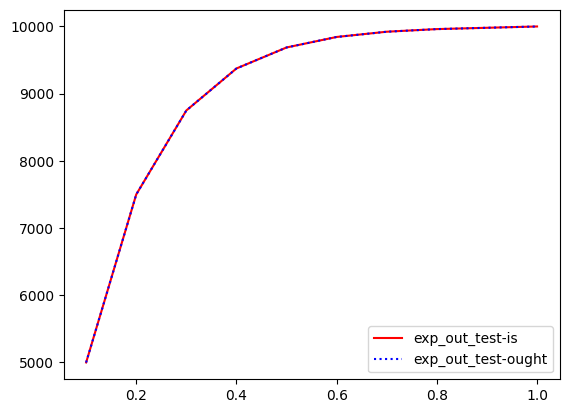

In [47]:
import os, numpy, json
from itertools import zip_longest
from pathlib import Path
import matplotlib.pyplot as plt

def chunk2(items): 
    return zip_longest(*[iter(items)]*2)

notebook_path = Path(os.path.abspath("tests.ipynb")).parent.absolute()
results = chunk2(filter(lambda fn: fn.endswith(".json"), sorted(os.listdir(notebook_path))))

def load_data(fn):
    """
    loads chart data from a JSON file. Adds a percentage of the last element 
    to each value so that we can actually see several charts overlaid on top of one another.
    """
    with open(fn, 'rb') as fh:
        data = json.load(fh)
        data = [float(n) for n in data]
        return data
for pair in results:
    x_range = numpy.arange(0.1, 1.1, 0.1)
    file_is = pair[0]
    file_ought = pair[1]
    a = load_data(file_is)
    b = load_data(file_ought)
    plt.plot(x_range, a, color="r", label=file_is.replace(".json", ""))
    plt.plot(x_range, b, color="b", linestyle='dotted', label=file_ought.replace(".json", ""))
    plt.legend()
    plt.show()